# 04 - Common Sampling Biases

**Bias:** A systematic error in how data is collected that skews results.

Common types:
- **Selection Bias:** Only certain people are included (e.g., only happy customers surveyed)
- **Survivorship Bias:** Only "winners" studied, failures ignored
- **Response Bias:** People don't answer honestly (say what sounds good)

**Key Idea:** Once bias sneaks in, you can't fix it later. Garbage in, garbage out.

**Historical Example:** 1936 presidential poll only asked people with telephones (rich people). Prediction was completely wrong!

## Simple Example: Selection Bias in Classroom Survey

Imagine surveying only students who sit in the front row about class engagement.

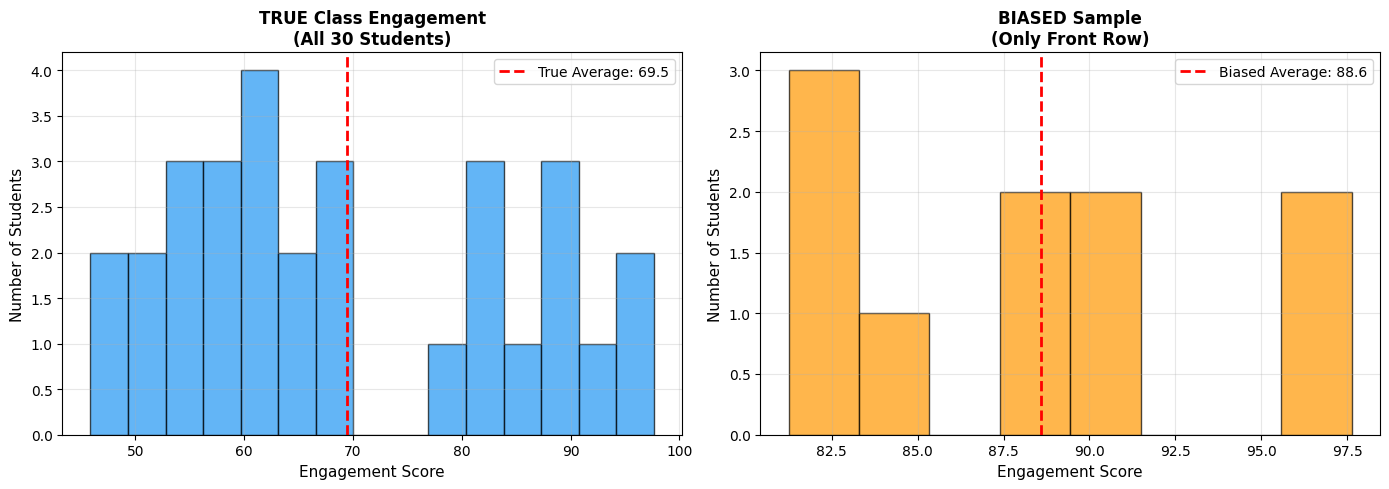


❌ BIASED estimate (front row only): 88.6
✅ TRUE class average: 69.5

→ Bias error: 19.1 points!
→ We think the class is more engaged than it really is


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# TRUE engagement scores for all students
# Front row students are generally more engaged
front_row_engagement = np.random.normal(85, 8, 10)  # Mean 85, more engaged
back_row_engagement = np.random.normal(65, 10, 20)  # Mean 65, less engaged

all_students = np.concatenate([front_row_engagement, back_row_engagement])
true_average = np.mean(all_students)

# BIASED sample: only front row
biased_average = np.mean(front_row_engagement)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# True distribution
ax1.hist(all_students, bins=15, color='#2196F3', alpha=0.7, edgecolor='black')
ax1.axvline(true_average, color='red', linestyle='--', linewidth=2, label=f'True Average: {true_average:.1f}')
ax1.set_xlabel('Engagement Score', fontsize=11)
ax1.set_ylabel('Number of Students', fontsize=11)
ax1.set_title('TRUE Class Engagement\n(All 30 Students)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Biased sample
ax2.hist(front_row_engagement, bins=8, color='#FF9800', alpha=0.7, edgecolor='black')
ax2.axvline(biased_average, color='red', linestyle='--', linewidth=2, label=f'Biased Average: {biased_average:.1f}')
ax2.set_xlabel('Engagement Score', fontsize=11)
ax2.set_ylabel('Number of Students', fontsize=11)
ax2.set_title('BIASED Sample\n(Only Front Row)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n❌ BIASED estimate (front row only): {biased_average:.1f}")
print(f"✅ TRUE class average: {true_average:.1f}")
print(f"\n→ Bias error: {biased_average - true_average:.1f} points!")
print("→ We think the class is more engaged than it really is")

## Real-World Example: Survivorship Bias in Fitness Apps

A fitness app analyzes only users who are still active after 6 months. What about early quitters?

**Problem:** Ignoring dropouts creates false predictions about "all users."

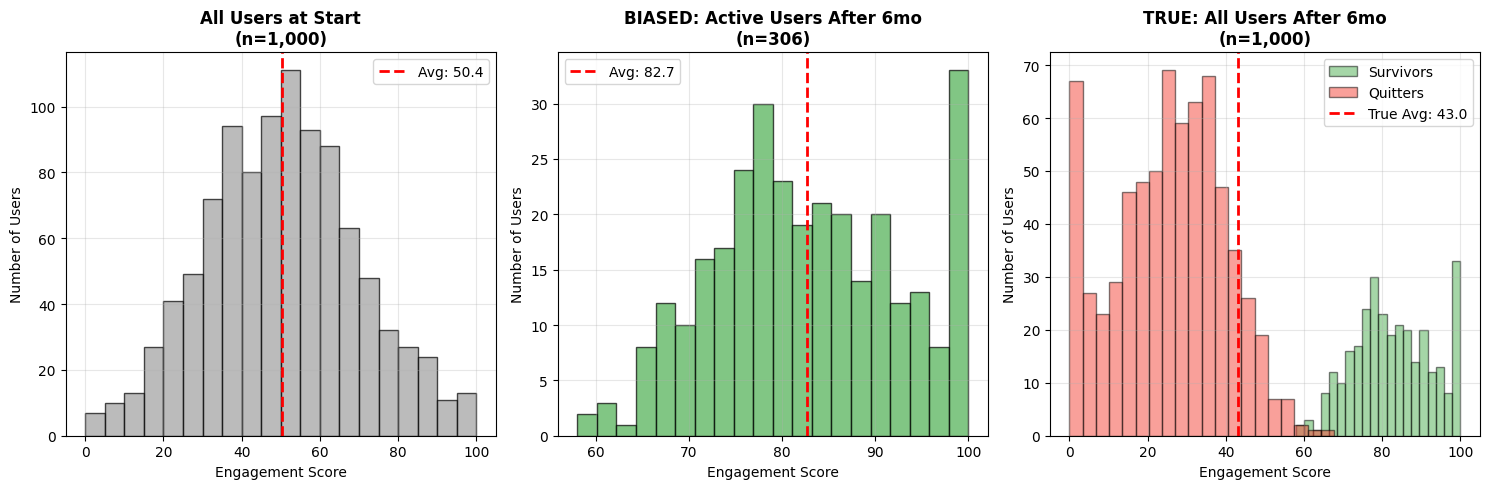


📊 Initial average engagement: 50.4

❌ BIASED conclusion (survivors only): 82.7
   → 'The app increases engagement by 32.4 points!'

✅ TRUE outcome (including quitters): 43.0
   → Actual change: -7.3 points

⚠️ Survivorship bias made us think the app works better than it does!
   → 694 users (69%) quit but were ignored in analysis


In [2]:
# Simulate 1000 users who start using the app
np.random.seed(42)
total_users = 1000

# All users: initial engagement scores
all_users_initial = np.random.normal(50, 20, total_users)
all_users_initial = np.clip(all_users_initial, 0, 100)

# After 6 months: only highly engaged users remain (survivorship bias)
# Users with initial engagement > 60 are more likely to stay
survivors = all_users_initial[all_users_initial > 60]
quitters = all_users_initial[all_users_initial <= 60]

# 6-month engagement (survivors improve, quitters would have declined)
survivors_6mo = survivors + np.random.normal(10, 5, len(survivors))  # Improvement
survivors_6mo = np.clip(survivors_6mo, 0, 100)

quitters_6mo = quitters - np.random.normal(15, 8, len(quitters))  # Would have declined
quitters_6mo = np.clip(quitters_6mo, 0, 100)

# Calculate averages
biased_conclusion = np.mean(survivors_6mo)  # Only analyzing survivors
true_outcome = np.mean(np.concatenate([survivors_6mo, quitters_6mo]))  # All users

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Initial state
axes[0].hist(all_users_initial, bins=20, color='#9E9E9E', alpha=0.7, edgecolor='black')
axes[0].axvline(np.mean(all_users_initial), color='red', linestyle='--', linewidth=2, 
                label=f'Avg: {np.mean(all_users_initial):.1f}')
axes[0].set_title('All Users at Start\n(n=1,000)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Engagement Score')
axes[0].set_ylabel('Number of Users')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Survivors only (biased view)
axes[1].hist(survivors_6mo, bins=20, color='#4CAF50', alpha=0.7, edgecolor='black')
axes[1].axvline(biased_conclusion, color='red', linestyle='--', linewidth=2,
                label=f'Avg: {biased_conclusion:.1f}')
axes[1].set_title(f'BIASED: Active Users After 6mo\n(n={len(survivors_6mo)})', 
                 fontsize=12, fontweight='bold')
axes[1].set_xlabel('Engagement Score')
axes[1].set_ylabel('Number of Users')
axes[1].legend()
axes[1].grid(alpha=0.3)

# True picture (including quitters)
axes[2].hist(survivors_6mo, bins=20, color='#4CAF50', alpha=0.5, label='Survivors', edgecolor='black')
axes[2].hist(quitters_6mo, bins=20, color='#F44336', alpha=0.5, label='Quitters', edgecolor='black')
axes[2].axvline(true_outcome, color='red', linestyle='--', linewidth=2,
                label=f'True Avg: {true_outcome:.1f}')
axes[2].set_title('TRUE: All Users After 6mo\n(n=1,000)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Engagement Score')
axes[2].set_ylabel('Number of Users')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Initial average engagement: {np.mean(all_users_initial):.1f}")
print(f"\n❌ BIASED conclusion (survivors only): {biased_conclusion:.1f}")
print(f"   → 'The app increases engagement by {biased_conclusion - np.mean(all_users_initial):.1f} points!'")
print(f"\n✅ TRUE outcome (including quitters): {true_outcome:.1f}")
print(f"   → Actual change: {true_outcome - np.mean(all_users_initial):.1f} points")
print(f"\n⚠️ Survivorship bias made us think the app works better than it does!")
print(f"   → {len(quitters)} users ({len(quitters)/total_users*100:.0f}%) quit but were ignored in analysis")

## Key Takeaways

### Why Bias Matters
- **Can't fix it later:** No statistical technique can correct biased data collection
- **False conclusions:** Biased samples lead to wrong predictions and bad decisions
- **Wasted resources:** Building models on biased data wastes time and money

### How to Avoid Bias
1. **Representative sampling:** Ensure all relevant groups are included
2. **Include failures:** Don't just study successes (survivorship bias)
3. **Random selection:** Avoid convenient or self-selected samples
4. **Question your data:** Ask "Who's missing from this sample?"

**Remember:** Garbage in, garbage out. Start with good data!